In [20]:
import pandas as pd
import numpy as np

In [21]:
#1.Implement Naïve Bayes method using scikit-learn library 
# Use dataset available with name glass 
# Use train_test_split to create training and testing part 
# Evaluate the model on test part using score and 
# classification_report(y_true, y_pred)


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score


glass_data = pd.read_csv('C:\\Users\\gella\\Downloads\\NeuralNetworks\\glass.csv')

x_train = glass_data.drop("Type", axis=1)
y_train = glass_data['Type']


x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

# Train the model using the training sets
gnb = GaussianNB()
gnb.fit(x_train, y_train)


y_pred = gnb.predict(x_test)
# Classification report 
qual_report = classification_report(y_test, y_pred)
print(qual_report)
print("Naive Bayes accuracy is: ",  (accuracy_score(y_test, y_pred))*100)

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

Naive Bayes accuracy is:  37.2093023255814


In [22]:
#2.Implement linear SVM method using scikit-learn 
# Use the same dataset above
# Use train_test_split to create training and testing part
# Evaluate the model on test part using score and 
# classification_report(y_true, y_pred)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


glass_data = pd.read_csv('C:\\Users\\gella\\Downloads\\NeuralNetworks\\glass.csv')

x_train = glass_data.drop("Type", axis=1)
y_train = glass_data['Type']
# splitting train and test data using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

# Train the model using the training sets
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
# Classification report 
qual_report = classification_report(y_test, y_pred, zero_division = 0)
print(qual_report)
print("SVM accuracy is: ", accuracy_score(y_test, y_pred)*100)


              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

SVM accuracy is:  20.930232558139537


In [23]:
# 3.Implement Linear Regression using scikit-learn
# (a)Import the given “Salary_Data.csv”
dst_Sal = pd.read_csv('C:\\Users\\gella\\Downloads\\NeuralNetworks\\Salary_Data.csv')
dst_Sal.info()
dst_Sal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [24]:
A = dst_Sal.iloc[:, :-1].values   #excluding last column i.e., years of experience column
B = dst_Sal.iloc[:, 1].values     #only salary column

In [25]:
# (b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
from sklearn.model_selection import train_test_split 
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=1/3, random_state=0)

In [26]:
# (c) Train and predict the model.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(A_train, B_train)
B_Pred = reg.predict(A_test)
B_Pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [27]:
# (d) Calculate the mean_squared error
S_error = (B_Pred - B_test) ** 2
Sum_Serror = np.sum(S_error)
mean_squared_error = Sum_Serror / B_test.size
mean_squared_error

21026037.329511296

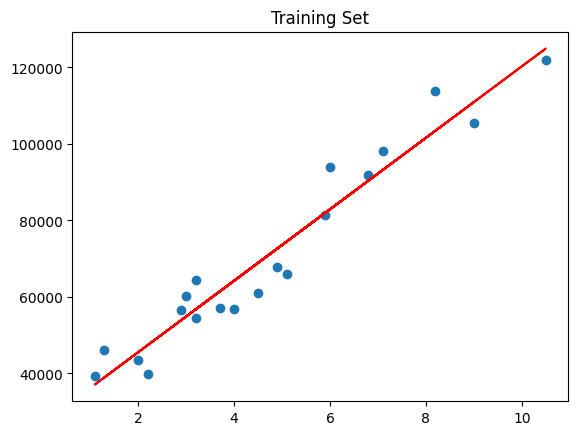

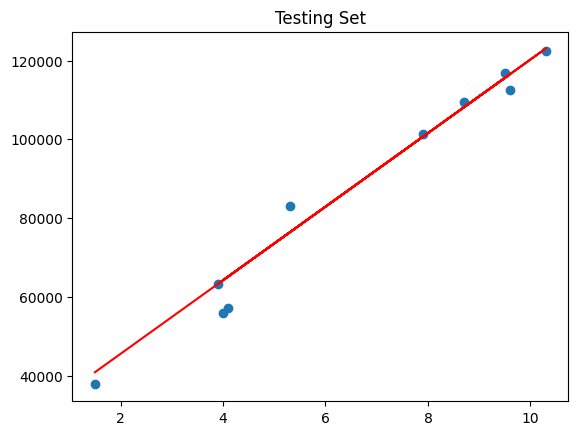

In [29]:
# (e) Visualize both train and test data using scatter plot.
import matplotlib.pyplot as plt
# Training Data set
plt.scatter(A_train, B_train)
plt.plot(A_train, reg.predict(A_train), color='red')
plt.title('Training Set')
plt.show()

# Testing Data set
plt.scatter(A_test, B_test)
plt.plot(A_test, reg.predict(A_test), color='red')
plt.title('Testing Set')
plt.show()